In [7]:
import numpy as np
import random

In [8]:
def gradient_descent(alpha,x,y,ep=.0001,max_iter=10000):
    converged=False
    iter=0
    m=x.shape[0]
    changes=[]
    
    #initiate beta values
    
    t0=np.random.random(x.shape[1])
    t1=np.random.random(x.shape[1])
    
    #Total error
    
    J=sum([(t0+t1*x[i]-y[i])**2 for i in range(m)])
    
    
    while not converged:
        grad0=1.0/m*sum([(t0+t1*x[i]-y[i]) for i in range(m)])
        grad1=1.0/m*sum([(t0+t1*x[i]-y[i])*x[i] for i in range(m)])
    
        temp0=t0-alpha*grad0
        temp1=t1-alpha*grad1

        t0=temp0
        t1=temp1

        changes.append((t0,t1))

        #mean squared error

        e=sum([(t0+t1*x[i]-y[i])**2 for i in range(m)])

        if abs(J-e)<=ep:
            print('converged after {} iterations',iter)
            converged=True
        J=e
        iter+=1
        if iter==max_iter:
            print('Max interactions exceeded!')
            converged=True
    return t0,t1,changes 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

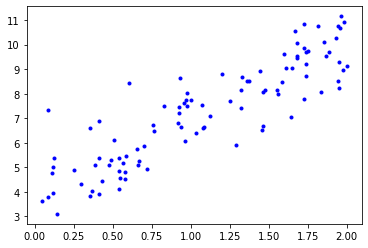

In [10]:
def get_random_points():
    X=2*np.random.rand(100,1)
    y=4+3*X+np.random.randn(100,1)
    return X,y
fig=plt.figure()

X,y=get_random_points()
plt.plot(X,y,'b.');
plt.show

converged after {} iterations 114


RuntimeError: Requested MovieWriter (ffmpeg) not available

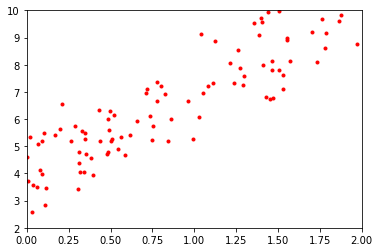

In [13]:
from matplotlib import animation
from IPython.display import HTML

x1=np.array([0.,2.])
fig,ax=plt.subplots()

ax.set_xlim(0,2)
ax.set_ylim(2,10)

line,=ax.plot([],[],lw=2)

X,y=get_random_points()
w1,b1,changes=gradient_descent(0.2,X,y,max_iter=200)

y1=x1*changes[0][0]+changes[0][1]
plt.plot(X,y,'r.');

def init():
    line.set_data([],[])
    return (line,)

def animate(i):
    w1,b1=changes[i]
    y1=x1*w1+b1
    line.set_data(x1,y1)
    return(line,)
anim=animation.FuncAnimation(fig,animate,init_func=init,
                            frames=100,interval=50,
                            blit=True)
HTML(anim.to_html5_video())

In [14]:
!conda install -c conda-forge-forge ffmpeg --y


UnavailableInvalidChannel: The channel is not accessible or is invalid.
  channel name: conda-forge-forge
  channel url: https://conda.anaconda.org/conda-forge-forge
  error code: 404

You will need to adjust your conda configuration to proceed.
Use `conda config --show channels` to view your configuration's current state,
and use `conda config --show-sources` to view config file locations.


